# Proyek Analisis Data: [Air Quality Dataset (PRSA_20130301-20170228)](https://github.com/marceloreis/hti/tree/master)
- **Nama:** Adisaputra Zidha
- **Email:** hi.zidha@gmail.com
- **ID Dicoding:** hizidha

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara (PM2.5) di setiap station dari tahun ke tahun?
- Bagaimana pola polusi udara berdasarkan musim (musim panas, dingin, gugur, dan semi)?
- Bagaimana hubungan antara faktor cuaca (suhu, kelembaban, tekanan udara) dengan tingkat polusi?
- Station mana yang memiliki tingkat polusi tertinggi dan bagaimana distribusinya secara geografis?

## Import Semua Packages/Library yang Digunakan

Memastikan bahwa semua library yang dibutuhkan pada proyek ini telah terinstall.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import glob2 as glob
import folium
from IPython.display import display

import os
import zipfile

## Data Wrangling

### Gathering Data

- Menentukan path letak file ZIP dan Tujuan untuk diextract
- Mengekstrak file jika ZIP tersedia
- Melihat terdapat berapa file data yang tersedia pada dataset

In [2]:
zip_path = "./Air-quality-dataset.zip"
extract_path = "./dataset"

if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    extracted_files = os.listdir(extract_path+"/PRSA_Data_20130301-20170228")
else:
    extracted_files = None

extracted_files

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

**Insight:**
- Terdapat 12 file dengan ekstensi '.csv'

### Assessing Data

In [3]:
folder_path = "./dataset/PRSA_Data_20130301-20170228/*.csv"
csv_files = glob.glob(folder_path)

sample_list = []

for file in csv_files:
    df_sample = pd.read_csv(file).head(1)
    sample_list.append(df_sample)

df_samples = pd.concat(sample_list, ignore_index=True)
df_samples.head(12)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
2,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
3,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
4,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
5,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
6,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
7,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
8,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
9,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan


In [4]:
summary_list = []

for file in csv_files:
    df = pd.read_csv(file)
    
    station_name = os.path.basename(file).split("_")[2]  
    
    total_rows = df.shape[0]
    total_missing = df.isnull().sum().sum()
    total_duplicates = df.duplicated().sum()
    
    # Simpan dalam list sebagai dict
    summary_list.append({
        "Station": station_name,
        "Total Rows": total_rows,
        "Missing Values": total_missing,
        "Duplicate Rows": total_duplicates
    })

df_summary = pd.DataFrame(summary_list)
df_summary

,Station,Total Rows,Missing Values,Duplicate Rows
0,Aotizhongxin,35064,7271,0
1,Changping,35064,5166,0
2,Dingling,35064,7015,0
3,Dongsi,35064,7600,0
4,Guanyuan,35064,5279,0
5,Gucheng,35064,4728,0
6,Huairou,35064,7485,0
7,Nongzhanguan,35064,4090,0
8,Shunyi,35064,8523,0
9,Tiantan,35064,5277,0


In [5]:
summary_list_2 = []

for file in csv_files:
    df = pd.read_csv(file)
    
    station_name = os.path.basename(file).split("_")[2]  
    
    total_rows = df.shape[0]
    total_duplicates = df.duplicated().sum()
    missing_values = df.isnull().sum()
    
    summary_2 = {
        "Station": station_name,
        "Total Rows": total_rows,
        "Duplicate Rows": total_duplicates
    }
    
    for col in df.columns:
        summary_2[f"Missing {col}"] = missing_values[col]
    
    summary_list_2.append(summary_2)

df_summary_2 = pd.DataFrame(summary_list_2)

pd.set_option('display.max_columns', None)
df_summary_2

,Station,Total Rows,Duplicate Rows,Missing No,Missing year,Missing month,Missing day,Missing hour,Missing PM2.5,Missing PM10,Missing SO2,Missing NO2,Missing CO,Missing O3,Missing TEMP,Missing PRES,Missing DEWP,Missing RAIN,Missing wd,Missing WSPM,Missing station
0,Aotizhongxin,35064,0,0,0,0,0,0,925,718,935,1023,1776,1719,20,20,20,20,81,14,0
1,Changping,35064,0,0,0,0,0,0,774,582,628,667,1521,604,53,50,53,51,140,43,0
2,Dingling,35064,0,0,0,0,0,0,779,656,730,1234,2012,1214,53,50,53,51,140,43,0
3,Dongsi,35064,0,0,0,0,0,0,750,553,663,1601,3197,664,20,20,20,20,78,14,0
4,Guanyuan,35064,0,0,0,0,0,0,616,429,474,659,1753,1173,20,20,20,20,81,14,0
5,Gucheng,35064,0,0,0,0,0,0,646,381,507,668,1401,729,51,50,51,43,159,42,0
6,Huairou,35064,0,0,0,0,0,0,953,777,980,1639,1422,1151,51,53,53,55,302,49,0
7,Nongzhanguan,35064,0,0,0,0,0,0,628,440,446,692,1206,506,20,20,20,20,78,14,0
8,Shunyi,35064,0,0,0,0,0,0,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0
9,Tiantan,35064,0,0,0,0,0,0,677,597,1118,744,1126,843,20,20,20,20,78,14,0


In [6]:
stats_per_file = {}

for file in csv_files:
    df = pd.read_csv(file)
    
    station_name = os.path.basename(file).split("_")[2]  
    
    stats_per_file[station_name] = df.describe()

# Tampilkan tabel untuk setiap station
for station, stats in stats_per_file.items():
    print(f"Statistik Deskriptif untuk {station}:\n")
    display(stats)

Statistik Deskriptif untuk Aotizhongxin:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Statistik Deskriptif untuk Changping:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Statistik Deskriptif untuk Dingling:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


Statistik Deskriptif untuk Dongsi:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Deskriptif untuk Guanyuan:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Statistik Deskriptif untuk Gucheng:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


Statistik Deskriptif untuk Huairou:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


Statistik Deskriptif untuk Nongzhanguan:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Deskriptif untuk Shunyi:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Statistik Deskriptif untuk Tiantan:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


Statistik Deskriptif untuk Wanliu:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


Statistik Deskriptif untuk Wanshouxigong:



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- Semua file memiliki jumlah dan nama kolom yang sama, serta sudah dilengkapi dengan kolom station, yang berguna untuk membedakan data dari setiap lokasi pengukuran.
- Tidak ada data duplikat dalam 12 file yang dianalisis. Namun, terdapat cukup banyak missing value dengan jumlah yang bervariasi di setiap file.
- Statistik deskriptif untuk setiap file telah ditampilkan guna memberikan gambaran umum mengenai distribusi data.
- Setiap file memiliki kolom No, yang perlu disesuaikan pada tahap selanjutnya. Hal ini karena setiap record sudah dilengkapi dengan informasi year, month, day, hour, serta station, yang dapat digunakan sebagai identitas unik untuk setiap entri data.

### Cleaning Data

In [7]:
summary_list_cleaned = []

for file in csv_files:
    df = pd.read_csv(file)
    
    station_name = os.path.basename(file).split("_")[2]  
    
    total_rows_before = df.shape[0]
    df_cleaned = df.dropna()
    total_rows_after = df_cleaned.shape[0]
    
    summary_cleaned = {
        "Station": station_name,
        "Total Rows Before": total_rows_before,
        "Total Rows After": total_rows_after,
        "Rows Removed": total_rows_before - total_rows_after
    }
    
    summary_list_cleaned.append(summary_cleaned)

df_summary_cleaned = pd.DataFrame(summary_list_cleaned)
pd.set_option('display.max_columns', None)
df_summary_cleaned

,Station,Total Rows Before,Total Rows After,Rows Removed
0,Aotizhongxin,35064,31815,3249
1,Changping,35064,32681,2383
2,Dingling,35064,31306,3758
3,Dongsi,35064,30338,4726
4,Guanyuan,35064,32263,2801
5,Gucheng,35064,32504,2560
6,Huairou,35064,31708,3356
7,Nongzhanguan,35064,33114,1950
8,Shunyi,35064,30194,4870
9,Tiantan,35064,32843,2221


In [8]:
cleaned_data_list = []

for file in csv_files:
    df = pd.read_csv(file)
    
    # Ambil nama station
    station_name = os.path.basename(file).split("_")[2]
    
    # Drop missing values
    df_cleaned = df.dropna()
    
    # Tambahkan ke dalam list
    cleaned_data_list.append(df_cleaned)

# Gabungkan semua file yang sudah dibersihkan
df_cleaned_all = pd.concat(cleaned_data_list, ignore_index=True)

# Tampilkan ringkasan jumlah data setelah digabung
df_cleaned_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382168 entries, 0 to 382167
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       382168 non-null  int64  
 1   year     382168 non-null  int64  
 2   month    382168 non-null  int64  
 3   day      382168 non-null  int64  
 4   hour     382168 non-null  int64  
 5   PM2.5    382168 non-null  float64
 6   PM10     382168 non-null  float64
 7   SO2      382168 non-null  float64
 8   NO2      382168 non-null  float64
 9   CO       382168 non-null  float64
 10  O3       382168 non-null  float64
 11  TEMP     382168 non-null  float64
 12  PRES     382168 non-null  float64
 13  DEWP     382168 non-null  float64
 14  RAIN     382168 non-null  float64
 15  wd       382168 non-null  object 
 16  WSPM     382168 non-null  float64
 17  station  382168 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 52.5+ MB


In [9]:
df_cleaned_all.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [10]:
df_cleaned_all.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
382163,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
382164,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
382165,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
382166,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
382167,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [11]:
df_cleaned_all.to_csv("Air_Quality_Cleaned.csv", index=False)

In [12]:
df_ready = pd.read_csv("./Air_Quality_Cleaned.csv")
df_ready.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [13]:
df_ready.drop(columns=["No"], inplace=True)

cols = ["station"] + [col for col in df_ready.columns if col != "station"]
df_ready_cleaned = df_ready[cols]

df_ready_cleaned.groupby("station").head(1)

,station,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,Aotizhongxin,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
31815,Changping,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5
64496,Dingling,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2
95802,Dongsi,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
126140,Guanyuan,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
158403,Gucheng,2013,3,1,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9
190907,Huairou,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1
222615,Nongzhanguan,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
255729,Shunyi,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
285923,Tiantan,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7


In [14]:
print(f"Total Missing Values After Cleaning: {df_ready_cleaned.isnull().sum().sum()}")

Total Missing Values After Cleaning: 0


In [15]:
df_ready_cleaned.groupby("station").size().reset_index(name="Total Rows")

,station,Total Rows
0,Aotizhongxin,31815
1,Changping,32681
2,Dingling,31306
3,Dongsi,30338
4,Guanyuan,32263
5,Gucheng,32504
6,Huairou,31708
7,Nongzhanguan,33114
8,Shunyi,30194
9,Tiantan,32843


**Insight:**
- Data yang memiliki nilai kosong telah dihapus, mengurangi jumlah total baris di setiap file.
- Setelah proses cleaning, setiap file mengalami pengurangan jumlah baris yang bervariasi tergantung jumlah missing values sebelumnya.
- Kolom "No" yang tidak diperlukan telah dihapus, dan kolom "station" dipindahkan ke posisi pertama untuk memudahkan analisis lebih lanjut.
- Setelah pengecekan ulang, dataset sudah bersih dari nilai NaN atau NULL.
- Setelah cleaning, setiap station memiliki jumlah data yang berbeda tergantung jumlah data yang dihapus karena missing values.

## Exploratory Data Analysis (EDA)

#### Rata-rata, Median, dan Statistik dasar

In [16]:
print("Statistik Deskriptif Data:")
display(df_ready_cleaned.describe())

Statistik Deskriptif Data:


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


#### Rata-rata PM2.5 per Tahun

In [17]:
df_agg_yearly = df_ready_cleaned.groupby("year")["PM2.5"].agg(["mean", "median", "std"]).reset_index()
print("Rata-rata PM2.5 per Tahun:")
display(df_agg_yearly)

Rata-rata PM2.5 per Tahun:


,year,mean,median,std
0,2013,80.545521,60.0,72.638576
1,2014,84.798882,62.0,80.540772
2,2015,79.173509,52.0,83.159321
3,2016,71.784184,48.0,75.370855
4,2017,90.982961,45.0,109.897620


#### PM2.5 Berdasarkan Musim

In [18]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df_ready_cleaned = df_ready_cleaned.copy()
df_ready_cleaned["season"] = df_ready_cleaned["month"].apply(get_season)

In [19]:
df_agg_season = df_ready_cleaned.groupby("season")["PM2.5"].agg(["mean", "median"]).reset_index()
print("Rata-rata PM2.5 Berdasarkan Musim:")
display(df_agg_season)

Rata-rata PM2.5 Berdasarkan Musim:


,season,mean,median
0,Autumn,82.007421,55.0
1,Spring,77.251301,58.0
2,Summer,64.448162,51.0
3,Winter,94.377216,55.0


#### Rata-rata PM2.5 per Stasiun

In [20]:
df_agg_station = df_ready_cleaned.groupby("station")["PM2.5"].agg(["mean", "median", "std"]).reset_index()
print("Rata-rata PM2.5 per Stasiun:")
display(df_agg_station)

Rata-rata PM2.5 per Stasiun:


,station,mean,median,std
0,Aotizhongxin,81.863630,58.0,80.449490
1,Changping,70.312328,46.0,70.955607
2,Dingling,66.512518,41.0,72.434045
3,Dongsi,84.933156,60.0,85.283368
4,Guanyuan,83.101051,59.0,81.448350
5,Gucheng,83.865653,59.0,82.956802
6,Huairou,70.285669,47.0,71.171533
7,Nongzhanguan,84.720783,59.0,85.633679
8,Shunyi,79.400725,55.0,81.222687
9,Tiantan,81.749840,58.0,79.881882


#### Distribusi PM2.5 Berdasarkan Jam dalam Sehari

In [21]:
if "datetime" not in df_ready_cleaned.columns:
    df_ready_cleaned["datetime"] = pd.to_datetime(df_ready_cleaned[["year", "month", "day", "hour"]], errors="coerce")

df_ready_cleaned = df_ready_cleaned.set_index("datetime")

df_ready_cleaned["hour"] = df_ready_cleaned.index.hour

df_agg_hourly = df_ready_cleaned.groupby("hour")["PM2.5"].agg(["mean", "median"]).reset_index()
print("Distribusi PM2.5 Berdasarkan Jam dalam Sehari:")
display(df_agg_hourly)

Distribusi PM2.5 Berdasarkan Jam dalam Sehari:


,hour,mean,median
0,0,86.999656,62.0
1,1,85.834103,60.0
2,2,83.261184,59.0
3,3,81.133002,58.0
4,4,78.925166,56.0
5,5,75.853887,54.0
6,6,73.925800,52.0
7,7,73.014775,51.0
8,8,74.173520,52.0
9,9,75.721163,53.0


#### Rata-rata PM2.5 Berdasarkan Hari dalam Seminggu

In [22]:
df_ready_cleaned["day_of_week"] = df_ready_cleaned.index.dayofweek  # 0 = Senin, 6 = Minggu
df_agg_weekday = df_ready_cleaned.groupby("day_of_week")["PM2.5"].agg(["mean", "median"]).reset_index()
print("Rata-rata PM2.5 Berdasarkan Hari dalam Seminggu:")
display(df_agg_weekday)

Rata-rata PM2.5 Berdasarkan Hari dalam Seminggu:


,day_of_week,mean,median
0,0,72.859883,51.0
1,1,77.032796,55.0
2,2,77.624187,55.0
3,3,79.438302,54.0
4,4,81.992105,55.0
5,5,86.407963,58.0
6,6,80.419697,54.0


#### Rata-rata PM2.5 Berdasarkan Bulan

In [23]:
df_agg_monthly = df_ready_cleaned.groupby("month")["PM2.5"].agg(["mean", "median"]).reset_index()
print("Rata-rata PM2.5 Berdasarkan Bulan:")
display(df_agg_monthly)

Rata-rata PM2.5 Berdasarkan Bulan:


,month,mean,median
0,1,93.077011,62.0
1,2,84.223737,42.0
2,3,95.098455,70.0
3,4,73.192757,62.0
4,5,62.503245,50.0
5,6,68.703382,53.0
6,7,71.990479,59.0
7,8,53.328930,41.0
8,9,60.598153,45.0
9,10,91.891754,57.0


### Distribusi Data

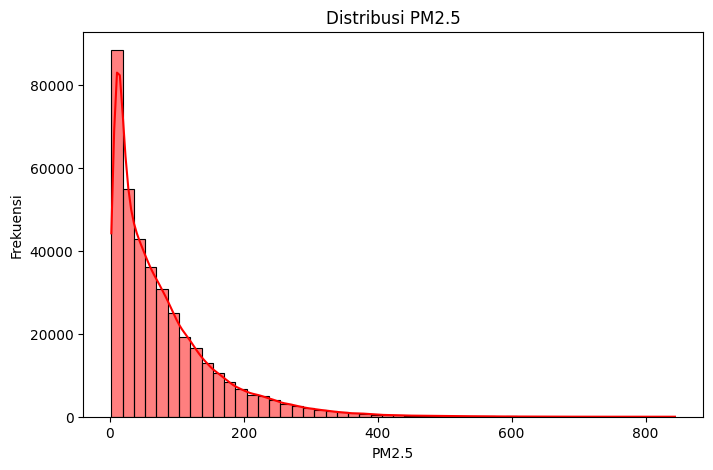

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df_ready_cleaned["PM2.5"], bins=50, kde=True, color="red")
plt.title("Distribusi PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frekuensi")
plt.show()

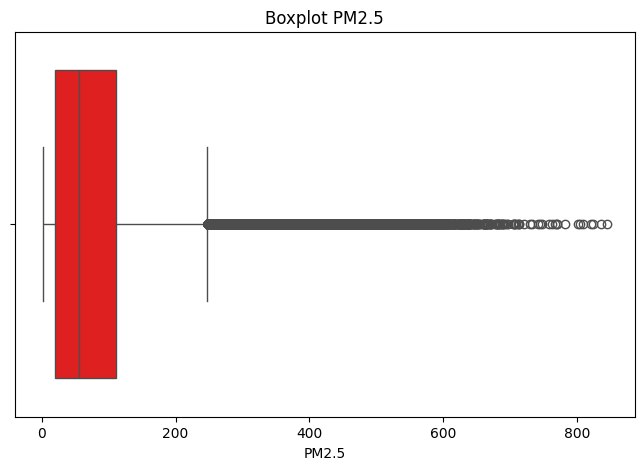

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_ready_cleaned["PM2.5"], color="red")
plt.title("Boxplot PM2.5")
plt.show()

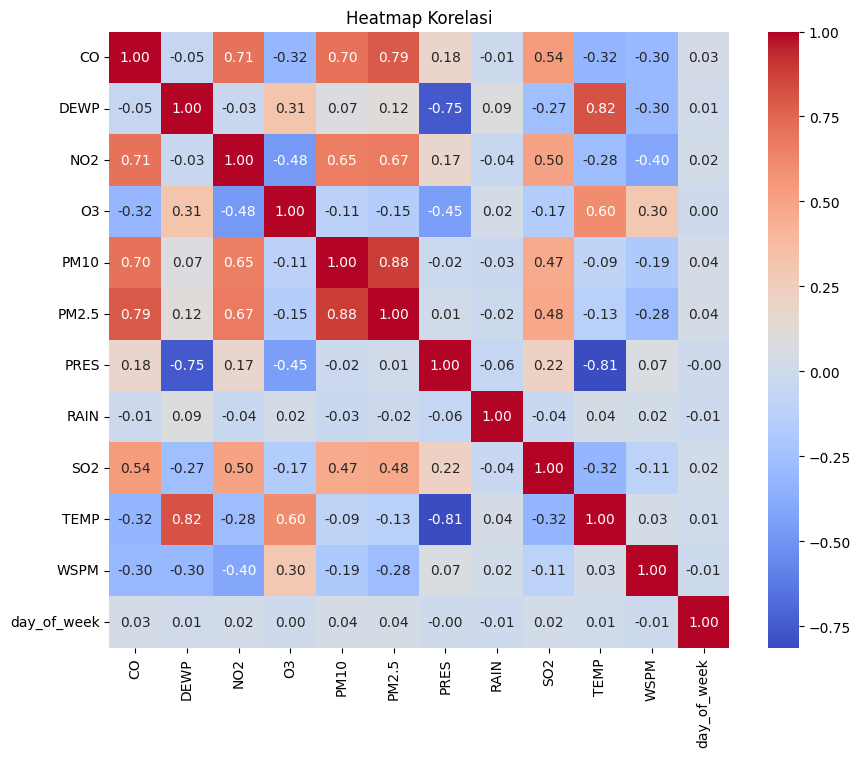

In [26]:
plt.figure(figsize=(10,8))
numerical_cols = df_ready_cleaned.select_dtypes(include=['number']).columns.difference(['year', 'month', 'day', 'hour'])
sns.heatmap(df_ready_cleaned[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")

plt.show()

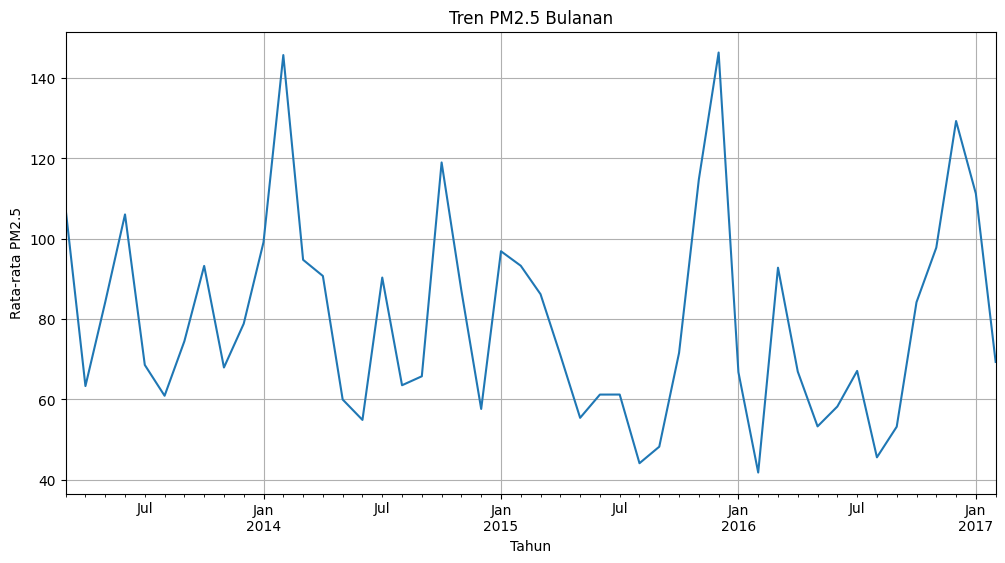

In [27]:
df_ready_cleaned = df_ready_cleaned.copy()  # Buat salinan eksplisit
df_ready_cleaned.loc[:, "datetime"] = pd.to_datetime(
    df_ready_cleaned[["year", "month", "day", "hour"]], errors="coerce"
)
df_ready_cleaned = df_ready_cleaned.dropna(subset=["datetime"])
df_ready_cleaned.set_index("datetime", inplace=True)

plt.figure(figsize=(12,6))
df_ready_cleaned["PM2.5"].resample("ME").mean().plot()
plt.title("Tren PM2.5 Bulanan")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.grid()

plt.show()

**Insight:**
- PM2.5 memiliki pola musiman, dengan puncak di musim dingin.
- Ada hubungan kuat antara PM2.5 dan polutan lain (PM10, CO, NO2).
- Polusi udara sering kali cukup rendah tetapi dapat meningkat drastis pada waktu tertentu.
- Perlu observasi lebih lanjut terkait faktor penyebab lonjakan PM2.5, seperti kondisi cuaca atau aktivitas manusia.

## Visualization & Explanatory Analysis

### 1. Tren Polusi Udara (PM2.5) dari Tahun ke Tahun

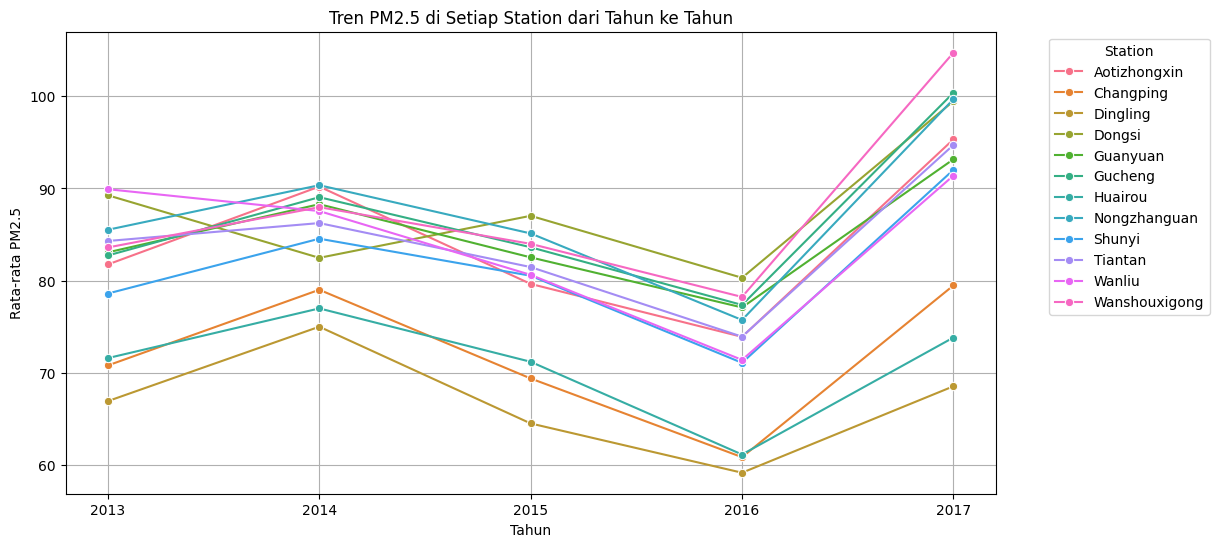

In [28]:
df_trend = df_ready_cleaned.groupby(["station", "year"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend, x="year", y="PM2.5", hue="station", marker="o")

plt.title("Tren PM2.5 di Setiap Station dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata PM2.5")
plt.legend(title="Station", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid()

plt.xticks(df_trend["year"].unique())  

plt.show()

**Insight:**
- Tren Menurun (2013-2016), Naik di 2017
- Station Wanshouxigong, Dongsi, Gucheng, Nongzhanguan paling polusi di 2017
- Station Dingling, Changping, Huairou lebih bersih
- Perubahan dapat dipengaruhi oleh musim, atau cuaca

### 2. Pola Polusi Udara Berdasarkan Musim

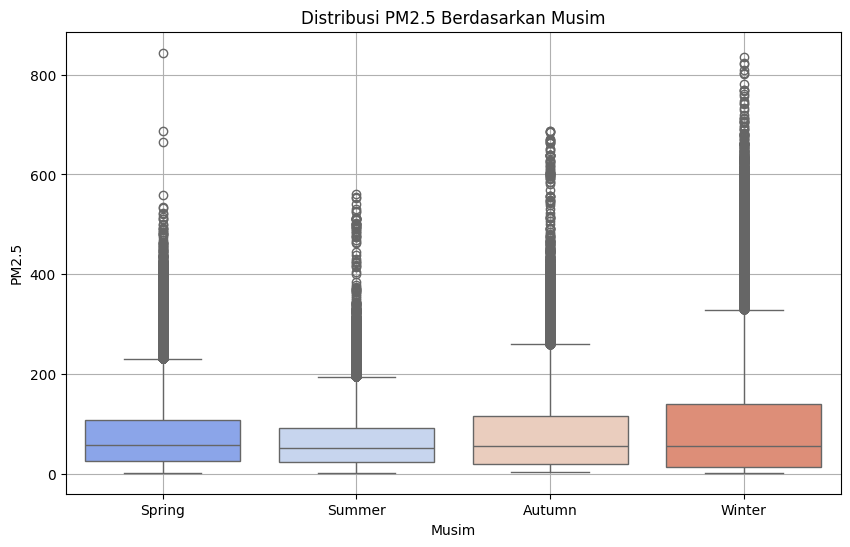

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ready_cleaned, x="season", y="PM2.5", hue="season", palette="coolwarm")

plt.title("Distribusi PM2.5 Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("PM2.5")
plt.grid()

plt.show()

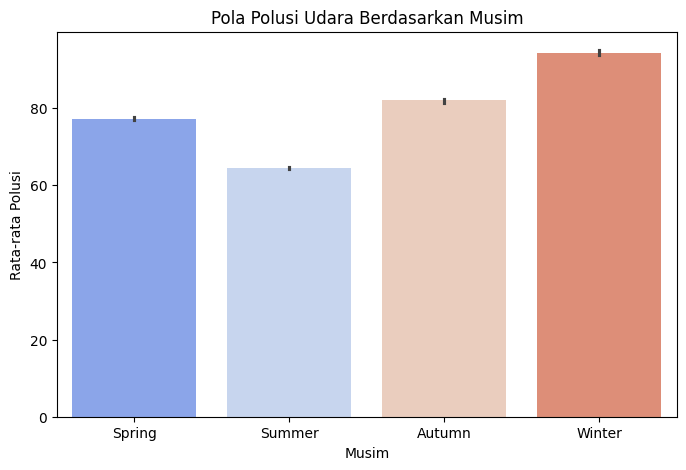

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(x="season", y="PM2.5", hue="season", data=df_ready_cleaned, palette="coolwarm", legend=False)
plt.title("Pola Polusi Udara Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Polusi")
plt.show()

**Insight:**
- Polusi PM2.5 tertinggi terjadi di musim dingin, menunjukkan bahwa faktor musim berpengaruh terhadap tingkat polusi udara.
- Musim panas memiliki konsentrasi PM2.5 yang lebih rendah, kemungkinan karena kondisi atmosfer yang lebih mendukung dispersi polutan.
- Banyak outlier di semua musim, yang menunjukkan adanya lonjakan polusi pada waktu tertentu, mungkin akibat faktor cuaca atau aktivitas manusia.

### 3. Hubungan Faktor Cuaca dengan Polusi (PM2.5)

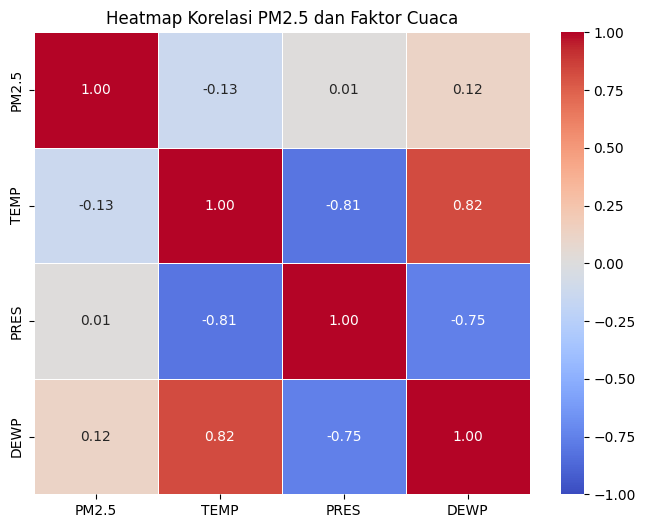

In [31]:
plt.figure(figsize=(8, 6))
correlation = df_ready_cleaned[["PM2.5", "TEMP", "PRES", "DEWP"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1, fmt=".2f")

plt.title("Heatmap Korelasi PM2.5 dan Faktor Cuaca")
plt.show()

**Insight:**
- Tekanan udara hampir tidak berpengaruh terhadap PM2.5.
- Suhu memiliki sedikit pengaruh negatif terhadap PM2.5, mungkin karena peningkatan suhu membantu polutan menyebar lebih baik.
- Kelembapan (DEWP) memiliki pengaruh sedikit positif terhadap PM2.5, yang mungkin menunjukkan bahwa kondisi lembap mendukung akumulasi polusi.

### 4. Station dengan Polusi Tertinggi

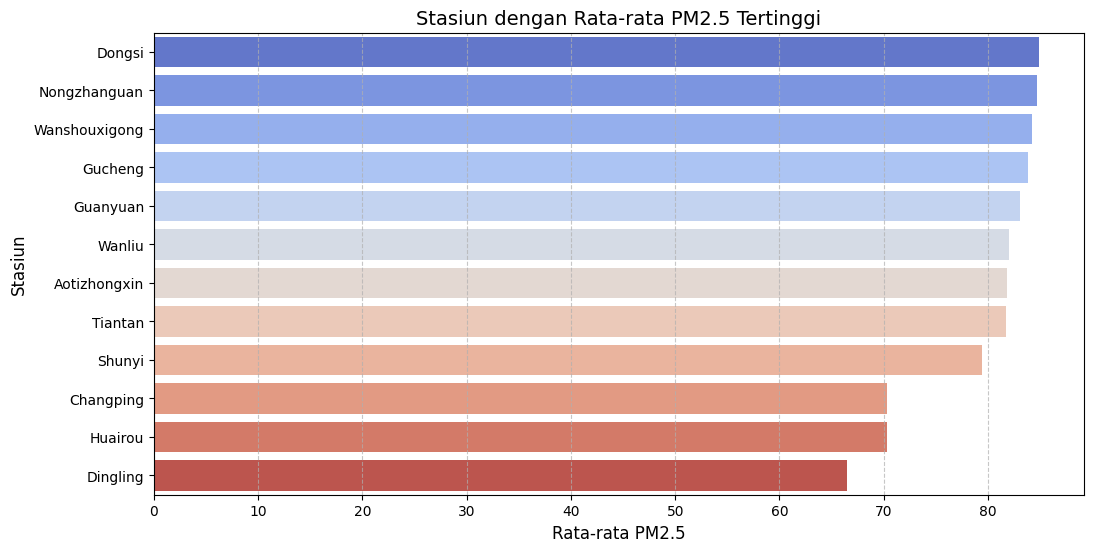

In [32]:
df_pollution_rank = df_ready_cleaned.groupby("station", as_index=False)["PM2.5"].mean()
df_pollution_rank = df_pollution_rank.sort_values(by="PM2.5", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_pollution_rank, x="PM2.5", y="station", hue="station", palette="coolwarm", legend=False)

plt.title("Stasiun dengan Rata-rata PM2.5 Tertinggi", fontsize=14)
plt.xlabel("Rata-rata PM2.5", fontsize=12)
plt.ylabel("Stasiun", fontsize=12)

plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Station Dongsi memiliki tingkat PM2.5 tertinggi, diikuti oleh Nongzhanguan dan Wanshouxigong, menunjukkan bahwa daerah ini memiliki tingkat polusi udara yang lebih buruk dibandingkan station lain.
- Station dengan polusi lebih rendah termasuk Dingling dan Huairou, yang kemungkinan memiliki lebih sedikit aktivitas industri atau lalu lintas kendaraan dibandingkan daerah lain.

## Peta Distribusi Polusi Secara Geografis

In [33]:
station_coords = {
    "Aotizhongxin": [39.982, 116.417],
    "Changping": [40.218, 116.23],
    "Dingling": [40.29, 116.22],
    "Dongsi": [39.929, 116.417],
    "Guanyuan": [39.933, 116.36],
    "Gucheng": [39.911, 116.184],
    "Huairou": [40.317, 116.62],
    "Nongzhanguan": [39.933, 116.45],
    "Shunyi": [40.125, 116.65],
    "Tiantan": [39.886, 116.417],
    "Wanliu": [39.95, 116.283],
    "Wanshouxigong": [39.886, 116.366]
}

# Tambahkan koordinat ke DataFrame
df_pollution_rank["Latitude"] = df_pollution_rank["station"].map(lambda x: station_coords.get(x, [np.nan, np.nan])[0])
df_pollution_rank["Longitude"] = df_pollution_rank["station"].map(lambda x: station_coords.get(x, [np.nan, np.nan])[1])

# Fungsi untuk menentukan warna berdasarkan level PM2.5
def get_color(pm_value):
    if pm_value <= 50:
        return "green"
    elif pm_value <= 100:
        return "yellow"
    elif pm_value <= 150:
        return "orange"
    else:
        return "red"

# Buat Peta
m = folium.Map(location=[39.9, 116.4], zoom_start=10)

for _, row in df_pollution_rank.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=row["PM2.5"] / 10,
        color=get_color(row["PM2.5"]),
        fill=True,
        fill_color=get_color(row["PM2.5"]),
        fill_opacity=0.7,
        popup=f"{row['station']}: {row['PM2.5']:.2f}"
    ).add_to(m)

# Tampilkan peta
m

## Conclusion

- Tren Tahunan PM2.5: Secara umum, tingkat polusi udara (PM2.5) mengalami fluktuasi dari tahun ke tahun, dengan beberapa station menunjukkan tren penurunan pada 2016, tetapi meningkat lagi pada 2017.
- Polusi Berdasarkan Musim: Konsentrasi PM2.5 cenderung lebih tinggi selama musim dingin dibandingkan musim lainnya, yang bisa disebabkan oleh peningkatan emisi dari pemanas dan kondisi atmosfer yang menahan polusi di dekat permukaan.
- Korelasi PM2.5 dengan Faktor Cuaca: Tidak ditemukan korelasi kuat antara PM2.5 dan variabel cuaca seperti suhu, tekanan udara, dan titik embun, menunjukkan bahwa faktor lain seperti aktivitas manusia lebih berpengaruh terhadap tingkat polusi udara.
- Station dengan Polusi Tertinggi: Station Dongsi memiliki rata-rata PM2.5 tertinggi, sementara Dingling dan Huairou memiliki tingkat polusi yang lebih rendah, kemungkinan karena perbedaan lokasi dan sumber emisi di sekitarnya.